<center>
    <h1>US Traffic Fatality Analysis<br>By: Jack Ross</h1>

![](https://images.radio.com/sunny981sd/burning%20car.jpg)
<h6><a href='https://sunny981sd.radio.com/blogs/aj-sara-morning/cops-virginia-pulled-woman-burning-car'>Image Source</h6>
<br>



<h2>Research Question:<br><br>Why has there been an increase in fatalities from 2014 to 2018 while the rate of seatbelt use has gone up and the rate of cell phone use has dropped? Why does it seem that driving is safer than it was 5 years ago but your chances of dying are higher now?</h2>

<h2>Step 1.) Load the Python libraries that we'll be using for this analysis.</h2>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Step 2.) Read in our aggregated crash dataset.</h2>

In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/JackRossProjects/Traffic-Fatality-Analysis/master/crash-data.csv')

In [ ]:
# We would also check for NaN values here but I have taken care of that while putting the data together

<h2>Step 3.) Visualize rows and columns to get a better idea of how different variables correlate.</h2>

In [7]:
df

,Category,2018,2017,2016,2015,2014
0,Fatal Crashes,33654.00,34560.00,34748.00,32538.00,30056.00
1,Drivers,18250.00,18816.00,18717.00,17615.00,16470.00
2,Passengers,5915.00,6237.00,6485.00,6213.00,5766.00
3,Unknown,56.00,74.00,74.00,71.00,71.00
4,Sub Total1,24221.00,25127.00,25276.00,23899.00,22307.00
5,Motorcyclists,4985.00,5229.00,5337.00,5029.00,4594.00
6,Pedestrians,6283.00,6075.00,6080.00,5494.00,4910.00
7,Pedalcyclists,857.00,806.00,853.00,829.00,729.00
8,Other/ Unknown,214.00,236.00,260.00,233.00,204.00
9,Sub Total2,7354.00,7117.00,7193.00,6556.00,5843.00


In [101]:
dft = df.T

In [106]:
dft

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
Category,Fatal Crashes,Drivers,Passengers,Unknown,Sub Total1,Motorcyclists,Pedestrians,Pedalcyclists,Other/ Unknown,Sub Total2,...,Resident Population (Thousands),Registered Vehicles (Millions),Licensed Drivers (Thousands),Seatbelt Use,Handheld Cellphone Use Rate,Visable Headset Cellphone Use Rate,Visable Manipulation of Handheld Device Rate,Restrain Use of Children Under 8 Rate,Distracted Driving Affected Crashes,Drunk Driving Fatalities (Per 100 million)
2018,33654,18250,5915,56,24221,4985,6283,857,214,7354,...,327167,279.1,227500,89.6,3.2,0.4,2.1,90.4,4637,10511
2017,34560,18816,6237,74,25127,5229,6075,806,236,7117,...,325147,270.4,225346,89.7,2.9,0.4,2,92.8,3166,10908
2016,34748,18717,6485,74,25276,5337,6080,853,260,7193,...,323071,264,221712,90.1,3.3,0.5,2.1,90.9,3526,10967
2015,32538,17615,6213,71,23899,5029,5494,829,233,6556,...,320743,257.9,218084,88.5,3.8,0.6,2.2,89.8,3477,10280
2014,30056,16470,5766,71,22307,4594,4910,729,204,5843,...,318386,252.6,214092,86.7,4.3,0.4,2.2,90.9,3179,9943


In [94]:
dfnocat = df.drop(['Category'], axis=1)
deaths = dfnocat.iloc[10]
deaths

2018    36560.0
2017    37473.0
2016    37806.0
2015    35484.0
2014    32744.0
Name: 10, dtype: float64

8


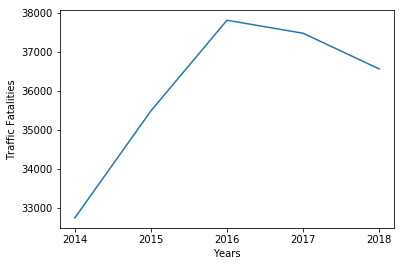

In [92]:
ax = sns.lineplot(data=crashes)
ax.set(xlabel='Years', ylabel='Traffic Fatalities')
print(32744/3816)

<h2>As we can see in the graph above, there has been an 8% increase in traffic fatalities since 2014 from 32,744 to 36,560 deaths per year.</h2>

In [95]:
seatbelt_use = dfnocat.iloc[15]
seatbelt_use

2018    89.6
2017    89.7
2016    90.1
2015    88.5
2014    86.7
Name: 15, dtype: float64

2.9


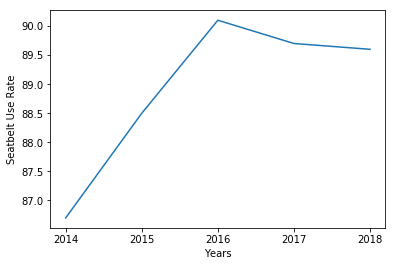

In [99]:
ax = sns.lineplot(data=seatbelt_use)
ax.set(xlabel='Years', ylabel='Seatbelt Use Rate')
print(89.6-86.7)

<h2>There was also a 2.9% rise in seatbelt usage from 2014 to 2018.</h2>

<h3>The data used is an aggregation of National Highway Traffic Safety Administration (NHTSA), Department of Transportation (DOT), and other data. The sources for the data are available <a href="https://github.com/JackRossProjects/Traffic-Fatality-Analysis/blob/master/data-sources.txt" target="_blank">here</a> and the aggregated CSV is available <a href="https://github.com/JackRossProjects/Traffic-Fatality-Analysis/blob/master/crash-data.csv" target="_blank">here</a>.</h3>

In [100]:
df.corr()

,2018,2017,2016,2015,2014
2018,1.000000,0.999975,0.999943,0.999931,0.999819
2017,0.999975,1.000000,0.999984,0.999941,0.999796
2016,0.999943,0.999984,1.000000,0.999963,0.999825
2015,0.999931,0.999941,0.999963,1.000000,0.999949
2014,0.999819,0.999796,0.999825,0.999949,1.000000


In [115]:
dft.to_csv(r'C:\home\jack\Desktop\transposed-crash-data.csv')